In [1]:
import numpy as np
import pandas as pd
from uncertainties import unumpy, ufloat

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter

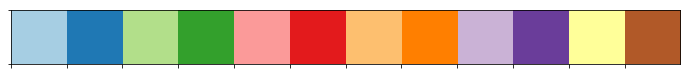

In [2]:
sns.palplot(sns.color_palette("Paired"))

In [3]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

params = {'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{helvet}',
                                 r'\usepackage{sansmath}',
                                 r'\sansmath',
                                 r'\sisetup{detect-all}']}
plt.rcParams.update(params)

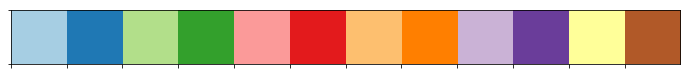

In [4]:
sns.palplot(sns.color_palette('Paired'))

### Read in Shuhei's calculated ratios

I made his ratio.dat in to an .xlsx file.

In [5]:
pol_dimer_th = pd.read_excel('ratio_th-20190618.xlsx', sheet_name='polarized')
unpol_dimer_th = pd.read_excel('ratio_th-20190618.xlsx', sheet_name='unpolarized')

### Read in experimental data
Experimental data in dimer_excited_state_data.xlsx

In [6]:
data = pd.read_excel('excited_dimer_data-20190424.xlsx', sheet_name='formatted_for_plotting')

### Make plot

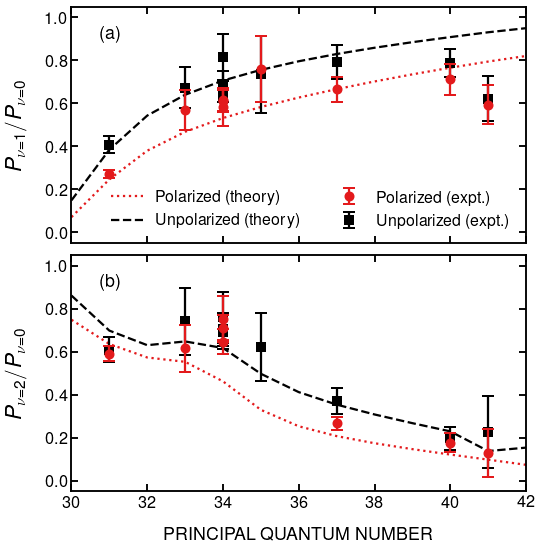

In [7]:
sns.set_context('talk')

theory_plot_options_pol = {'linestyle':':',
                           'color':sns.color_palette('Paired')[5]}

#theory_plot_options_unpol = {'linestyle':'--',
#                             'color':sns.color_palette('Paired')[1]}

theory_plot_options_unpol = {'linestyle':'--',
                             'color':'black'}

#experiment_plot_options = {'fmt':'.',
#                           'capsize':4,
#                           'markeredgewidth':2,
#                           'fillstyle':'none'}

experiment_plot_options_pol = {'fmt':'o',
                               'markersize':8,
                               'capsize':6,
                               'markeredgewidth':2,
                               'markeredgecolor':sns.color_palette('Paired')[5],
                               'markerfacecolor':sns.color_palette('Paired')[5],
                               'ecolor':sns.color_palette('Paired')[5]}

#experiment_plot_options_unpol = {'fmt':'s',
#                                 'markersize':8,
#                                 'capsize':6,
#                                 'markeredgewidth':2,
#                                 'markeredgecolor':sns.color_palette('Paired')[1],
#                                 'markerfacecolor':sns.color_palette('Paired')[1-1],
#                                 'ecolor':sns.color_palette('Paired')[1]}

experiment_plot_options_unpol = {'fmt':'s',
                                 'markersize':8,
                                 'capsize':6,
                                 'markeredgewidth':2,
                                 'markeredgecolor':'black',
                                 'markerfacecolor':'black',
                                 'ecolor':'black'}

pol_th_n = pol_dimer_th['n']
pol_D1D0_th = pol_dimer_th['v=1']/pol_dimer_th['v=0']
pol_D2D0_th = pol_dimer_th['v=2']/pol_dimer_th['v=0']

unpol_th_n = unpol_dimer_th['n']
unpol_D1D0_th = unpol_dimer_th['v=1']/unpol_dimer_th['v=0']
unpol_D2D0_th = unpol_dimer_th['v=2']/unpol_dimer_th['v=0']

# Make figure
[fig, axs] = plt.subplots(nrows=2, ncols=1, figsize=(8,8), sharex=True)

### Do theory plots
# Plot theoretical D1:D0 polarized ratios
axs[0].plot(pol_th_n, pol_D1D0_th,
            **theory_plot_options_pol,
            label='Polarized (theory)', zorder=0)

# Plot theoretical D2:D0 polarized ratios
axs[1].plot(pol_th_n, pol_D2D0_th,
            **theory_plot_options_pol,
            label='Polarized (theory)', zorder=0)

# Plot theoretical D1:D0 unpolarized ratios
axs[0].plot(unpol_th_n, unpol_D1D0_th,
            **theory_plot_options_unpol,
            label='Unpolarized (theory)', zorder=1)

# Plot theoretical D2:D0 unpolarized ratios
axs[1].plot(unpol_th_n, unpol_D2D0_th,
            **theory_plot_options_unpol,
            label='Unpolarized (theory)', zorder=1)

### Experimental plots
# Plot experimental d1:d0 polarized ratios
exp_df = data[(data['D1:D0 (pol)'].notnull()) & (data['D1:D0 (pol) (unc)'].notnull())]
n = exp_df['n']

# Plot experimental D1:D0 polarized ratios
axs[0].errorbar(exp_df['n'], exp_df['D1:D0 (pol)'], yerr=exp_df['D1:D0 (pol) (unc)'],
                **experiment_plot_options_pol,
                label='Polarized (expt.)', zorder=3)

# Plot experimental D2:D0 polarized ratios
axs[1].errorbar(exp_df['n'], exp_df['D2:D0 (pol)'], yerr=exp_df['D2:D0 (pol) (unc)'],
                **experiment_plot_options_pol,
                label='Polarized (expt.)', zorder=3)

# Plot experimental D1:D0 unpolarized ratios
axs[0].errorbar(exp_df['n'], exp_df['D1:D0 (unpol)'], yerr=exp_df['D1:D0 (unpol) (unc)'],
                **experiment_plot_options_unpol,
                label='Unpolarized (expt.)', zorder=2)

# Plot experimental D2:D0 unpolarized ratios
axs[1].errorbar(exp_df['n'], exp_df['D2:D0 (unpol)'], yerr=exp_df['D2:D0 (unpol) (unc)'],
                **experiment_plot_options_unpol,
                label='Unpolarized (expt.)', zorder=2)

# Setting plotting limits and tick options
for ax in axs:
    ax.tick_params(axis='both', which='both', direction='in', length=7)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.set_xlim((30, 42))
    ax.set_ylim((-0.05, 1.05))

# Axes labels
#plt.xlabel(r'$n$', fontsize=22)
plt.xlabel(r'PRINCIPAL QUANTUM NUMBER', fontsize=18, labelpad=16)
axs[0].set_ylabel(r'$P_{\nu=1}/P_{\nu=0}$', fontsize=22, labelpad=16)
axs[1].set_ylabel(r'$P_{\nu=2}/P_{\nu=0}$', fontsize=22, labelpad=16)

# Adding subfigure labels
axs[0].text(x=30.75, y=0.9, s=r'(a)')
axs[1].text(x=30.75, y=0.9, s=r'(b)')

# Axes legend
axs[0].legend(ncol=2, fontsize=16, loc='lower right', frameon=False)

plt.tight_layout()
fig.subplots_adjust(hspace=0.05)

#plt.savefig('Fig6.pdf', bbox_inches='tight')
plt.show()

## Plotting g^2(R) for n=0 and nu=1

### Checking to make sure I transcribed the amplitudes correctly

In [8]:
data_amp_corr = pd.read_excel('excited_dimer_data-20190424.xlsx', sheet_name='raw_amplitudes')

C:\Users\reyalp\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


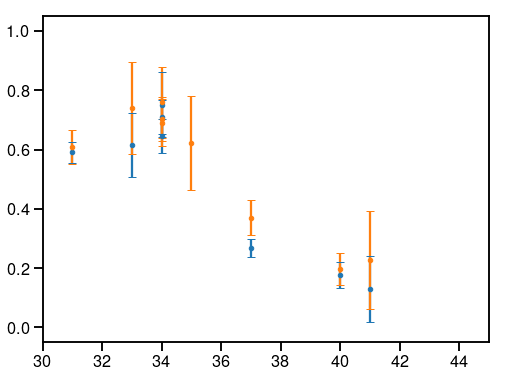

In [9]:
sns.set_context('talk')

fig = plt.figure(figsize=(8,6))
ax = plt.gca()

n = data_amp_corr['n']
upper = unumpy.uarray(data_amp_corr['D2 (pol)'], data_amp_corr['D2 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D0 (pol)'], data_amp_corr['D0 (pol) (unc)'])
ratio = upper/lower
plt.errorbar(n, unumpy.nominal_values(ratio), yerr=unumpy.std_devs(ratio), fmt='.', label='polarized D2:D0', capsize=4)

n = data_amp_corr['n']
upper = unumpy.uarray(data_amp_corr['D2 (unpol)'], data_amp_corr['D2 (unpol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D0 (unpol)'], data_amp_corr['D0 (unpol) (unc)'])
ratio = upper/lower
plt.errorbar(n, unumpy.nominal_values(ratio), yerr=unumpy.std_devs(ratio), fmt='.', label='unpolarized D2:D0', capsize=4)

plt.xlim((30, 45))
plt.ylim((-0.05, 1.05))

plt.show()

### Plotting

In [10]:
# Shuhei's g2 functions for nu=0 and nu=1, given in atomic units
A0 = 5.29177210903E-11 # Bohr radius [m]
H = 6.62607015E-34 # Planck's constant [J/Hz]
AMU = 1.66053906660E-27 # Atomic mass unit [kg]
KB = 1.380649E-23 # Boltzmann constant [J/K]

MASS = 86.9088775*AMU # [kg] mass of 87Sr atom

# Using 5sns, 3S1 quantum defects from: C. L. Vaillant et. al., 2012 J. Phys. B: At. Mol. Opt. Phys. 45 135004
d0 = 3.371
d2 = 0.5
d4 = -10

def qd(n, d0, d2, d4):
    return d0 + d2/(n-d0)**2 + d4/(n-d0)**4

def R0(n):
    return A0*1.87*(n-qd(n, d0, d2, d4))**2

def R1(n):
    return A0*1.6*(n-qd(n, d0, d2, d4))**2

# Thermal de Broglie wavelength
def wl_dB(T):
    return H/unumpy.sqrt(2*np.pi*MASS*KB*T)

def g2_func(R_scaled, epsilon):
    return 1 + epsilon*np.exp(-2*np.pi*R_scaled**2)

# https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-numpy
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [11]:
# Read in Shuhei's g2(R) theory calculations for nu=0, 1

g2_th_nu0 = pd.read_csv('g2_eval_nu0.dat', header=None, delim_whitespace=True)
g2_th_nu1 = pd.read_csv('g2_eval_nu1.dat', header=None, delim_whitespace=True)

#### Assuming T = 900 +- 100 nK

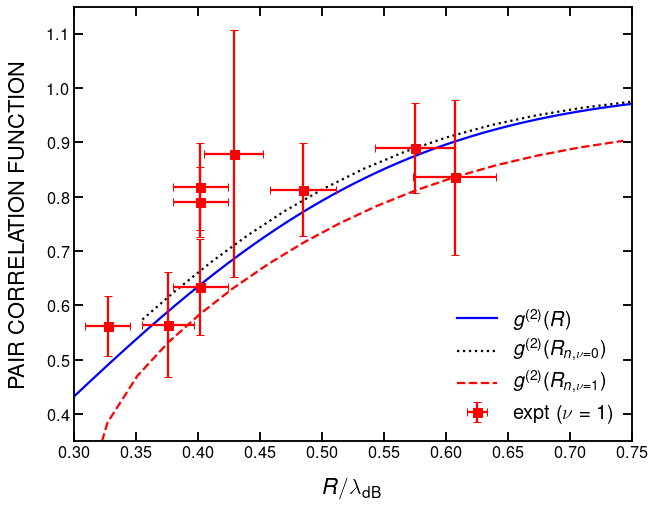

In [12]:
sns.set_context('talk')

# Polarized/unpolarized Clebsch-Gordan ratio
CG_factor = (11/13)/(46/275)

fig = plt.figure(figsize=(10,8))
ax = plt.gca()

################################
# nu=0 polarized/unpolarized ratio

# g2 (ideal)
R_scaled_ideal = np.linspace(0, 1, 1000, endpoint=True)
plt.plot(R_scaled_ideal, g2_func(R_scaled_ideal, -1), label=r'$g^{\pqty*{2}}\pqty*{R}$', color='blue', zorder=0)

# Experiment
n = data_amp_corr['n']

T_pol = unumpy.uarray(data_amp_corr['T0 (pol)'], data_amp_corr['T0 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr['T0 (unpol)'], data_amp_corr['T0 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)

T_all = np.concatenate([unumpy.nominal_values(T_pol), unumpy.nominal_values(T_unpol)])

T_avg = ufloat(np.average(T_all), (np.max(T_all)-np.min(T_all))/2)
T_avg = ufloat(900, 100)*1E-9
R_scaled = R0(n)/wl_dB(T_avg)

upper = unumpy.uarray(data_amp_corr['D0 (pol)'], data_amp_corr['D0 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D0 (unpol)'], data_amp_corr['D0 (unpol) (unc)'])
ratio = upper/lower/CG_factor
#plt.errorbar(unumpy.nominal_values(R_scaled), unumpy.nominal_values(ratio),
#             xerr = unumpy.std_devs(R_scaled), yerr=unumpy.std_devs(ratio),
#             fmt='o', label=r'$\nu=0$', capsize=4, color='black', zorder=2)

# Theory
plt.plot(g2_th_nu0[0], g2_th_nu0[1], ':', color='black', label=r'$g^{\pqty*{2}}\pqty*{R_{n,\nu=0}}$', zorder=1)

################################
# nu=1 polarized/unpolarized ratio

# Experiment
n = data_amp_corr['n']

T_pol = unumpy.uarray(data_amp_corr['T1 (pol)'], data_amp_corr['T1 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr['T1 (unpol)'], data_amp_corr['T1 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)

T_all = np.concatenate([unumpy.nominal_values(T_pol), unumpy.nominal_values(T_unpol)])

T_avg = ufloat(np.average(T_all), (np.max(T_all)-np.min(T_all))/2)
T_avg = ufloat(900, 100)*1E-9
R_scaled = R1(n)/wl_dB(T_avg)

upper = unumpy.uarray(data_amp_corr['D1 (pol)'], data_amp_corr['D1 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D1 (unpol)'], data_amp_corr['D1 (unpol) (unc)'])
ratio = upper/lower/CG_factor
plt.errorbar(unumpy.nominal_values(R_scaled), unumpy.nominal_values(ratio),
             xerr = unumpy.std_devs(R_scaled), yerr=unumpy.std_devs(ratio),
             fmt='s', label=r'expt $\pqty*{\nu=1}$', capsize=4, color='red', zorder=2)

# Theory
plt.plot(g2_th_nu1[0], g2_th_nu1[1], '--', color='red', label=r'$g^{\pqty*{2}}\pqty*{R_{n,\nu=1}}$', zorder=1)

################################
# Plotting stuff

# Axis limits
plt.xlim((0.3, 0.75))
plt.ylim((0.35, 1.15))

# Axis options
ax.tick_params(axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True)
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Plot labels
plt.xlabel(r'$R/\lambda_{\text{dB}}$', fontsize=22, labelpad=20)
plt.ylabel(r'PAIR CORRELATION FUNCTION', fontsize=22, labelpad=20)

plt.legend(frameon=False, loc='best', fontsize=20)

plt.savefig('Fig9-assuming_800-1000nK.pdf', bbox_inches='tight')

plt.show()

#### Plotting all data - scaled by n with T_avg = 900 +/- 100 nK

In [13]:
# Polarized/unpolarized Clebsch-Gordan ratio
CG_factor = (11/13)/(46/275)

# Using averaged n=34 data

# Calculate ratios from data set BEFORE averaging
upper = unumpy.uarray(data_amp_corr['D1 (pol)'], data_amp_corr['D1 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D1 (unpol)'], data_amp_corr['D1 (unpol) (unc)'])
ratio = upper/lower/CG_factor
out = pd.DataFrame({'n':data_amp_corr['n'].values,
                    'nu1':unumpy.nominal_values(ratio),
                    'nu1 (unc)':unumpy.std_devs(ratio)})

data_n_avg = pd.DataFrame(columns = out.columns)

for n in out['n'].unique():
    print('n: ' + str(n) + ' len: ' + str(len(out[out['n'] == n])))
    
    # If only one data set, append to data_n_avg and move on
    if len(out[out['n'] == n]) == 1:
        data_n_avg = data_n_avg.append(out[out['n'] == n], ignore_index=True)
    
    # If more than one data set, do some averaging, then append and move on
    else:
        nu1 = weighted_avg_and_std(out[out['n'] == n]['nu1'], out[out['n'] == n]['nu1 (unc)'])
        
        temp = pd.DataFrame({'n':n,
                             'nu1':[nu1[0]],
                             'nu1 (unc)':[nu1[1]]})
        
        data_n_avg = data_n_avg.append(temp, ignore_index=True)

n: 37 len: 1
n: 31 len: 1
n: 34 len: 3
n: 41 len: 1
n: 33 len: 1
n: 40 len: 1
n: 35 len: 1


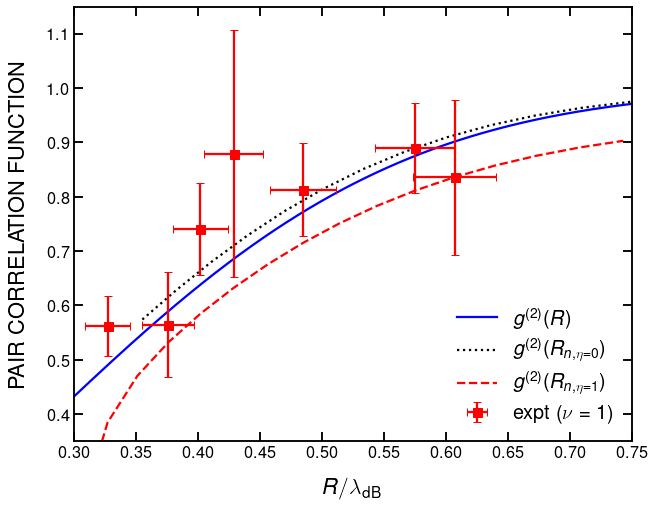

In [15]:
sns.set_context('talk')

fig = plt.figure(figsize=(10,8))
ax = plt.gca()

################################
# nu=0 polarized/unpolarized ratio

# g2 (ideal)
R_scaled_ideal = np.linspace(0, 1, 1000, endpoint=True)
plt.plot(R_scaled_ideal, g2_func(R_scaled_ideal, -1), label=r'$g^{\pqty*{2}}\pqty*{R}$', color='blue', zorder=0)

# Theory
plt.plot(g2_th_nu0[0], g2_th_nu0[1], ':', color='black', label=r'$g^{\pqty*{2}}\pqty*{R_{n,\eta=0}}$', zorder=1)

################################
# nu=1 polarized/unpolarized ratio

# Experiment
n = data_n_avg['n']
T_avg = ufloat(900, 100)*1E-9
R_scaled = R1(n)/wl_dB(T_avg)

plt.errorbar(unumpy.nominal_values(R_scaled), data_n_avg['nu1'],
             xerr = unumpy.std_devs(R_scaled), yerr=data_n_avg['nu1 (unc)'],
             fmt='s', label=r'expt $\pqty*{\nu=1}$', capsize=4, color='red', zorder=2)

# Theory
plt.plot(g2_th_nu1[0], g2_th_nu1[1], '--', color='red', label=r'$g^{\pqty*{2}}\pqty*{R_{n,\eta=1}}$', zorder=1)

################################
# Plotting stuff

# Axis limits
plt.xlim((0.3, 0.75))
plt.ylim((0.35, 1.15))

# Axis options
ax.tick_params(axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True)
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Plot labels
plt.xlabel(r'$R/\lambda_{\text{dB}}$', fontsize=22, labelpad=20)
plt.ylabel(r'PAIR CORRELATION FUNCTION', fontsize=22, labelpad=20)

plt.legend(frameon=False, loc='lower right', fontsize=20)

plt.savefig('Fig9-temp_range.pdf', bbox_inches='tight')

plt.show()

#### Plotting all data - scaled by average of polarized and unpolarized temperature

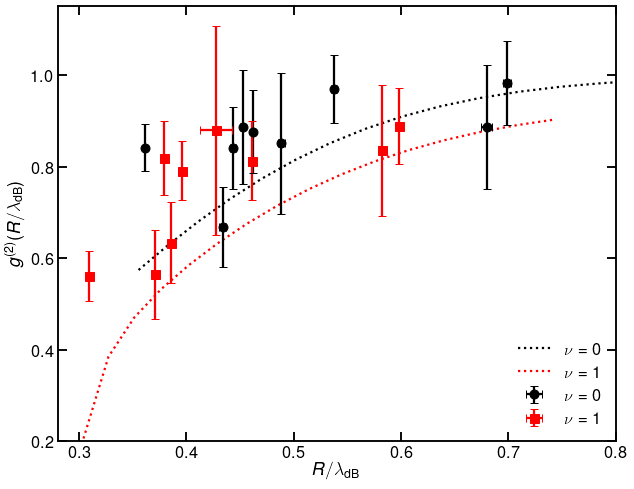

In [15]:
sns.set_context('talk')

# Polarized/unpolarized Clebsch-Gordan ratio
CG_factor = (11/13)/(46/275)

fig = plt.figure(figsize=(10,8))
ax = plt.gca()

################################
# nu=0 polarized/unpolarized ratio

# Experiment
n = data_amp_corr['n']

T_pol = unumpy.uarray(data_amp_corr['T0 (pol)'], data_amp_corr['T0 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr['T0 (unpol)'], data_amp_corr['T0 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)
R_scaled = R0(n)/wl_dB(T_avg)

upper = unumpy.uarray(data_amp_corr['D0 (pol)'], data_amp_corr['D0 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D0 (unpol)'], data_amp_corr['D0 (unpol) (unc)'])
ratio = upper/lower/CG_factor
plt.errorbar(unumpy.nominal_values(R_scaled), unumpy.nominal_values(ratio),
             xerr = unumpy.std_devs(R_scaled), yerr=unumpy.std_devs(ratio),
             fmt='o', label=r'$\nu=0$', capsize=4, color='black', zorder=2)

# Theory
plt.plot(g2_th_nu0[0], g2_th_nu0[1], ':', color='black', label=r'$\nu=0$', zorder=1)

################################
# nu=1 polarized/unpolarized ratio

# Experiment
n = data_amp_corr['n']

T_pol = unumpy.uarray(data_amp_corr['T1 (pol)'], data_amp_corr['T1 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr['T1 (unpol)'], data_amp_corr['T1 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)
R_scaled = R1(n)/wl_dB(T_avg)

upper = unumpy.uarray(data_amp_corr['D1 (pol)'], data_amp_corr['D1 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D1 (unpol)'], data_amp_corr['D1 (unpol) (unc)'])
ratio = upper/lower/CG_factor
plt.errorbar(unumpy.nominal_values(R_scaled), unumpy.nominal_values(ratio),
             xerr = unumpy.std_devs(R_scaled), yerr=unumpy.std_devs(ratio),
             fmt='s', label=r'$\nu=1$', capsize=4, color='red', zorder=2)

# Theory
plt.plot(g2_th_nu1[0], g2_th_nu1[1], ':', color='red', label=r'$\nu=1$', zorder=1)

################################
# Plotting stuff

# Axis options
ax.tick_params(axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True)

# Axis limits
plt.xlim((0.28, 0.8))
plt.ylim((0.2, 1.15))

# Plot labels
plt.xlabel(r'$R/\lambda_{\text{dB}}$')
plt.ylabel(r'${g}^{\pqty{2}}\pqty{R/\lambda_{\text{dB}}}$')

plt.legend(frameon=False, loc='lower right')

plt.savefig('Fig9-scaled_by_T.pdf', bbox_inches='tight')

plt.show()

#### Averaging n=34 fot plot

In [16]:
# Averaging affects n=34 data points.
data_amp_corr_averaged = data_amp_corr.copy(deep=True)

###############################################
# Polarized/unpolarized Clebsch-Gordan ratio
CG_factor = (11/13)/(46/275)

###############################################
# Calculate nu=0 polarized/unpolaried ratios
n = data_amp_corr['n']

T_pol = unumpy.uarray(data_amp_corr['T0 (pol)'], data_amp_corr['T0 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr['T0 (unpol)'], data_amp_corr['T0 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)
R_scaled = R0(n)/wl_dB(T_avg)

upper = unumpy.uarray(data_amp_corr['D0 (pol)'], data_amp_corr['D0 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D0 (unpol)'], data_amp_corr['D0 (unpol) (unc)'])
ratio = upper/lower/CG_factor

data_amp_corr_averaged['D0_ratio (mean)'] = unumpy.nominal_values(ratio)
data_amp_corr_averaged['D0_ratio (unc)'] = unumpy.std_devs(ratio)

###############################################
# Calculate nu=1 polarized/unpolaried ratios
n = data_amp_corr['n']

T_pol = unumpy.uarray(data_amp_corr['T1 (pol)'], data_amp_corr['T1 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr['T1 (unpol)'], data_amp_corr['T1 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)
R_scaled = R1(n)/wl_dB(T_avg)

upper = unumpy.uarray(data_amp_corr['D1 (pol)'], data_amp_corr['D1 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D1 (unpol)'], data_amp_corr['D1 (unpol) (unc)'])
ratio = upper/lower/CG_factor

data_amp_corr_averaged['D1_ratio (mean)'] = unumpy.nominal_values(ratio)
data_amp_corr_averaged['D1_ratio (unc)'] = unumpy.std_devs(ratio)

###############################################
df_temp = data_amp_corr_averaged.copy(deep=True)

# Drop row for n=34
data_amp_corr_averaged = data_amp_corr_averaged[data_amp_corr_averaged['n'] != 34]
data_amp_corr_averaged.reset_index(inplace=True)

# Drop all but n=34
df_temp = df_temp[df_temp['n'] == 34]

df_grouped = df_temp.groupby('n')
df_temp = df_grouped.agg([np.mean, np.std])
count = df_grouped.size().values
df_temp.reset_index(inplace=True)

df_n34 = pd.DataFrame({'dataset':'',
                       'n':34,
                       'D0_ratio (mean)':  df_temp['D0_ratio (mean)','mean'],
                       'D0_ratio (unc)':   df_temp['D0_ratio (mean)','std'],
                       'D1_ratio (mean)':  df_temp['D1_ratio (mean)','mean'],
                       'D1_ratio (unc)':   df_temp['D1_ratio (mean)','std'],
                       'T0 (pol)':         df_temp['T0 (pol)','mean'],
                       'T0 (pol) (unc)':   df_temp['T0 (pol)','std'],
                       'T1 (pol)':         df_temp['T1 (pol)','mean'],
                       'T1 (pol) (unc)':   df_temp['T1 (pol)','std'],
                       'T2 (pol)':         df_temp['T2 (pol)','mean'],
                       'T2 (pol) (unc)':   df_temp['T2 (pol)','std'],
                       'T0 (unpol)':       df_temp['T0 (unpol)','mean'],
                       'T0 (unpol) (unc)': df_temp['T0 (unpol)','std'],
                       'T1 (unpol)':       df_temp['T1 (unpol)','mean'],
                       'T1 (unpol) (unc)': df_temp['T1 (unpol)','std'],
                       'T2 (unpol)':       df_temp['T2 (unpol)','mean'],
                       'T2 (unpol) (unc)': df_temp['T2 (unpol)','std']})

# Rejoin n=34 with rest of data
data_amp_corr_averaged = pd.concat([data_amp_corr_averaged, df_n34], join='inner')

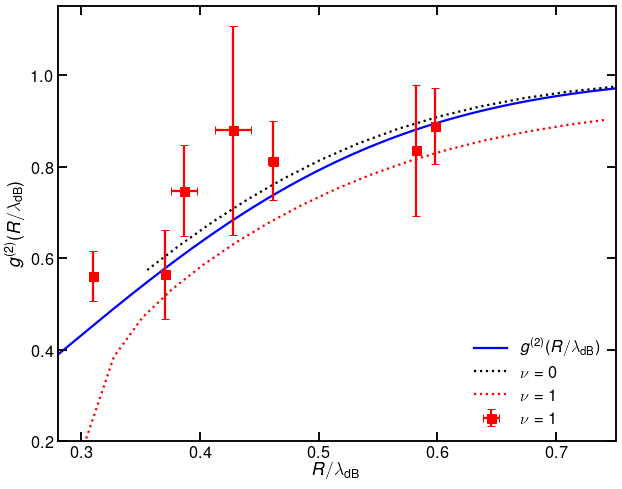

In [17]:
sns.set_context('talk')

# Polarized/unpolarized Clebsch-Gordan ratio
CG_factor = (11/13)/(46/275)

fig = plt.figure(figsize=(10,8))
ax = plt.gca()

################################
# nu=0 polarized/unpolarized ratio

# g2 (ideal)
R_scaled_ideal = np.linspace(0, 1, 1000, endpoint=True)
plt.plot(R_scaled_ideal, g2_func(R_scaled_ideal, -1), label=r'$g^{\pqty*{2}}\pqty*{R/\lambda_{\text{dB}}}$', color='blue', zorder=0)

# Experiment
n = data_amp_corr_averaged['n']
T_pol = unumpy.uarray(data_amp_corr_averaged['T0 (pol)'], data_amp_corr_averaged['T0 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr_averaged['T0 (unpol)'], data_amp_corr_averaged['T0 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)
R_scaled = R0(n)/wl_dB(T_avg)

ratio = unumpy.uarray(data_amp_corr_averaged['D0_ratio (mean)'], data_amp_corr_averaged['D0_ratio (unc)'])
#plt.errorbar(unumpy.nominal_values(R_scaled), unumpy.nominal_values(ratio),
#             xerr = unumpy.std_devs(R_scaled), yerr=unumpy.std_devs(ratio),
#             fmt='o', label=r'$\nu=0$', capsize=4, color='black', zorder=2)

# Theory
plt.plot(g2_th_nu0[0], g2_th_nu0[1], ':', color='black', label=r'$\nu=0$', zorder=1)

################################
# nu=1 polarized/unpolarized ratio

# Experiment
n = data_amp_corr_averaged['n']
T_pol = unumpy.uarray(data_amp_corr_averaged['T1 (pol)'], data_amp_corr_averaged['T1 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr_averaged['T1 (unpol)'], data_amp_corr_averaged['T1 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)
R_scaled = R1(n)/wl_dB(T_avg)

ratio = unumpy.uarray(data_amp_corr_averaged['D1_ratio (mean)'], data_amp_corr_averaged['D1_ratio (unc)'])
plt.errorbar(unumpy.nominal_values(R_scaled), unumpy.nominal_values(ratio),
             xerr = unumpy.std_devs(R_scaled), yerr=unumpy.std_devs(ratio),
             fmt='s', label=r'$\nu=1$', capsize=4, color='red', zorder=2)

# Theory
plt.plot(g2_th_nu1[0], g2_th_nu1[1], ':', color='red', label=r'$\nu=1$', zorder=1)

################################
# Plotting stuff

# Axis options
ax.tick_params(axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True)

# Axis limits
plt.xlim((0.28, 0.75))
plt.ylim((0.2, 1.15))

# Plot labels
plt.xlabel(r'$R/\lambda_{\text{dB}}$')
plt.ylabel(r'${g}^{\pqty{2}}\pqty{R/\lambda_{\text{dB}}}$')

plt.legend(frameon=False, loc='lower right')

plt.savefig('Fig9-scaled_by_T-averaged.pdf', bbox_inches='tight')

plt.show()

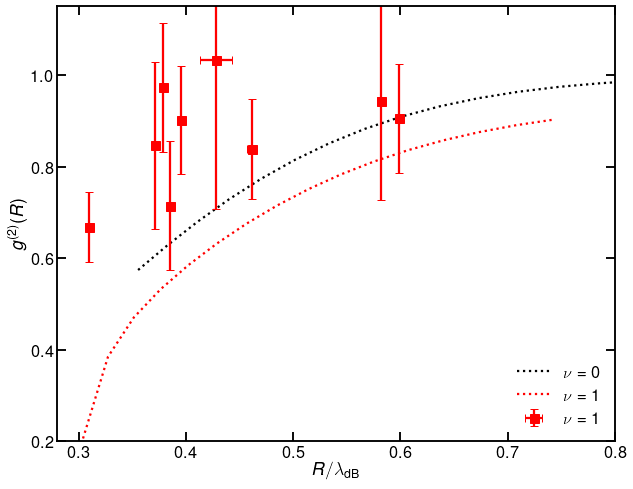

In [18]:
sns.set_context('talk')

# Polarized/unpolarized Clebsch-Gordan ratio
CG_factor = (11/13)/(46/275)

fig = plt.figure(figsize=(10,8))
ax = plt.gca()

################################
# nu=0 polarized/unpolarized ratio

# Experiment
n = data_amp_corr['n']

T_pol = unumpy.uarray(data_amp_corr['T0 (pol)'], data_amp_corr['T0 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr['T0 (unpol)'], data_amp_corr['T0 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)
R_scaled = R0(n)/wl_dB(T_avg)

upper = unumpy.uarray(data_amp_corr['D0 (pol)'], data_amp_corr['D0 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D0 (unpol)'], data_amp_corr['D0 (unpol) (unc)'])
ratio = upper/lower/CG_factor
#plt.errorbar(unumpy.nominal_values(R_scaled), unumpy.nominal_values(ratio),
#             xerr = unumpy.std_devs(R_scaled), yerr=unumpy.std_devs(ratio),
#             fmt='o', label=r'$\nu=0$', capsize=4, color='black', zorder=2)

# Theory
plt.plot(g2_th_nu0[0], g2_th_nu0[1], ':', color='black', label=r'$\nu=0$', zorder=1)

################################
# nu=1 polarized/unpolarized ratio

# Experiment
n = data_amp_corr['n']

T_pol = unumpy.uarray(data_amp_corr['T1 (pol)'], data_amp_corr['T1 (pol) (unc)'])
T_unpol = unumpy.uarray(data_amp_corr['T1 (unpol)'], data_amp_corr['T1 (unpol) (unc)'])
T_avg = np.mean(np.column_stack((T_pol,T_unpol)), axis=1)
R_scaled = R1(n)/wl_dB(T_avg)

upper = unumpy.uarray(data_amp_corr['D1 (pol)'], data_amp_corr['D1 (pol) (unc)'])/unumpy.uarray(data_amp_corr['D0 (pol)'], data_amp_corr['D0 (pol) (unc)'])
lower = unumpy.uarray(data_amp_corr['D1 (unpol)'], data_amp_corr['D1 (unpol) (unc)'])/unumpy.uarray(data_amp_corr['D0 (unpol)'], data_amp_corr['D0 (unpol) (unc)'])
ratio = upper/lower
plt.errorbar(unumpy.nominal_values(R_scaled), unumpy.nominal_values(ratio),
             xerr = unumpy.std_devs(R_scaled), yerr=unumpy.std_devs(ratio),
             fmt='s', label=r'$\nu=1$', capsize=4, color='red', zorder=2)

# Theory
plt.plot(g2_th_nu1[0], g2_th_nu1[1], ':', color='red', label=r'$\nu=1$', zorder=1)

################################
# Plotting stuff

# Axis options
ax.tick_params(axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True)

# Axis limits
plt.xlim((0.28, 0.8))
plt.ylim((0.2, 1.15))

# Plot labels
plt.xlabel(r'$R/\lambda_{\text{dB}}$')
plt.ylabel(r'${g}^{\pqty{2}}\pqty{R}$')

plt.legend(frameon=False, loc='lower right')

plt.savefig('Fig9-scaled_by_T.pdf', bbox_inches='tight')

plt.show()